In [1]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup
import requests
import json
import matplotlib.pyplot as plt
from matplotlib.offsetbox import OffsetImage, AnnotationBbox

def getImage(path, zoom=1):
    return OffsetImage(plt.imread(path), zoom=zoom)

In [2]:
headers = {
    'authority': 'api.sofascore.com',
    'accept': '*/*',
    'accept-language': 'en-US,en;q=0.9',
    'cache-control': 'max-age=0',
    'dnt': '1',
    'if-none-match': 'W/"4bebed6144"',
    'origin': 'https://www.sofascore.com',
    'referer': 'https://www.sofascore.com/',
    'sec-ch-ua': '"Not.A/Brand";v="8", "Chromium";v="114"',
    'sec-ch-ua-mobile': '?0',
    'sec-ch-ua-platform': '"macOS"',
    'sec-fetch-dest': 'empty',
    'sec-fetch-mode': 'cors',
    'sec-fetch-site': 'same-site',
    'user-agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/116.0.0.0 Safari/537.36',
}

In [3]:
response = requests.get('https://api.sofascore.com/api/v1/event/11352627/shotmap', headers=headers)

In [4]:
response.status_code

200

In [5]:
tiros = response.json()

In [6]:
df_xG = pd.DataFrame(tiros['shotmap'])[['isHome', 'shotType', 'xg','time','addedTime']]

In [7]:
df_xG['extendedMinute'] = df_xG['time'] + df_xG['addedTime']

In [8]:
df_xG = df_xG.sort_values(by='time').reset_index(drop=True)

In [9]:
df_xG.xg.cumsum()

0     0.039135
1     0.087568
2     0.158409
3     0.268756
4     0.313497
5     0.391741
6     0.417468
7     0.466776
8          NaN
9     0.894707
10    0.933816
11    1.309432
12    1.482053
13    1.607501
14    1.624248
15    1.935678
16    2.724078
17    3.064651
18    3.093733
19    3.139729
20    3.162439
21    3.222220
22    3.240922
23    3.315136
24    3.367120
25    3.414848
26    3.497847
Name: xg, dtype: float64

In [10]:
home_xG = df_xG[df_xG['isHome'] == True]
away_xG = df_xG[~df_xG['isHome'] == True]
home_xG['xG_cum'] = home_xG.xg.fillna(0).cumsum()
away_xG['xG_cum'] = away_xG.xg.fillna(0).cumsum()
goles_home = home_xG[home_xG['shotType'] == 'goal']
goles_away = away_xG[away_xG['shotType'] == 'goal']

<ipython-input-10-76323b3b057c>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  home_xG['xG_cum'] = home_xG.xg.fillna(0).cumsum()
<ipython-input-10-76323b3b057c>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  away_xG['xG_cum'] = away_xG.xg.fillna(0).cumsum()


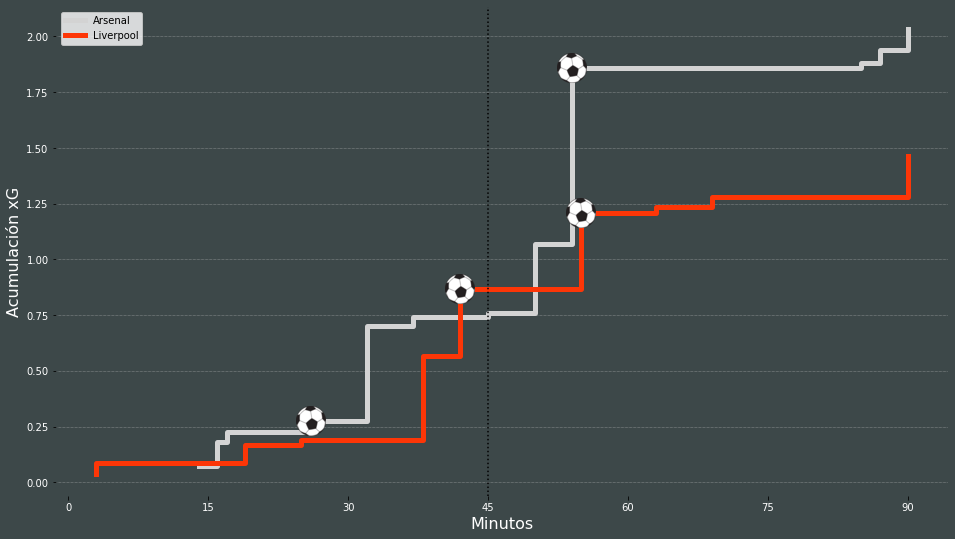

In [13]:
fig, ax = plt.subplots(figsize = (16,9))
fig.set_facecolor('#3d4849')
ax.patch.set_facecolor('#3d4849')
ax.grid(ls='dotted',lw=.5,color='lightgrey',axis='y',zorder=1)
spines = ['top','bottom','left','right']
for x in spines:
    if x in spines:
        ax.spines[x].set_visible(False)

plt.xticks([0,15,30,45,60,75,90],color='white')
plt.yticks(color='white')
plt.xlabel('Minutos',color='white',fontsize=16)
plt.ylabel('Acumulación xG',color='white',fontsize=16)
ax.step(x=home_xG['time'],y=home_xG['xG_cum'],color='#d3d3d3',label='Arsenal',linewidth=5,where='post')
ax.step(x=away_xG['time'],y=away_xG['xG_cum'],color='#fd3607',label='Liverpool',linewidth=5,where='post')
ax.axvline(45, ls=':', color='black', lw=1.5)

goles = [goles_home, goles_away]
for gol in goles:
    for x0, y0 in zip(gol['time'], gol['xG_cum']):
        ab = AnnotationBbox(getImage('archivos/pelota-modified (1).png'), (x0, y0), frameon=False)
        ax.add_artist(ab)
ax.legend()

plt.savefig('thumbnail_video.png', bbox_inches='tight', dpi=400)